In [132]:
# Imports basics
import os
import numpy as np
import h5py
import json
#import setGPU
import sklearn
#import corner
import scipy
import time
from tqdm import tqdm 
#import utils #import *
import sys
import glob
#import models
#import losses
# Imports neural net tools
import itertools
import torch
import torch.nn as nn
from torch.autograd.variable import *
import torch.optim as optim
import torch.nn.functional as F
#from fast_soft_sort.pytorch_ops import soft_rank
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score,  auc

from sklearn.preprocessing import OneHotEncoder
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
np.random.seed(42)


In [4]:
# -*- coding: utf-8 -*-
"""Demo to overlay multiple corners on top of each other"""
import corner
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

CORNER_KWARGS = dict(
    smooth=0.9,
    label_kwargs=dict(fontsize=16),
    title_kwargs=dict(fontsize=16),
    quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
    plot_density=False,
    plot_datapoints=False,
    fill_contours=True,
    show_titles=True,
    max_n_ticks=3,
)


def overlaid_corner(samples_list, sample_labels):
    """Plots multiple corners on top of each other"""
    # get some constants
    n = len(samples_list)
    _, ndim = samples_list[0].shape
    max_len = max([len(s) for s in samples_list])
    cmap = plt.cm.get_cmap('gist_rainbow', n)
    colors = [cmap(i) for i in range(n)]

    plot_range = []
    for dim in range(ndim):
        plot_range.append(
            [
                min([min(samples_list[i].T[dim]) for i in range(n)]),
                max([max(samples_list[i].T[dim]) for i in range(n)]),
            ]
        )

    CORNER_KWARGS.update(range=plot_range)

    fig = corner.corner(
        samples_list[0],
        color=colors[0],
        **CORNER_KWARGS
    )

    for idx in range(1, n):
        fig = corner.corner(
            samples_list[idx],
            fig=fig,
            weights=get_normalisation_weight(len(samples_list[idx]), max_len),
            color=colors[idx],
            **CORNER_KWARGS
        )

    plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=sample_labels[i])
            for i in range(n)
        ],
        fontsize=20, frameon=False,
        bbox_to_anchor=(1, ndim), loc="upper right"
    )
    plt.plot()
#     plt.savefig("corner.png")
#     plt.close()


def get_normalisation_weight(len_current_samples, len_of_longest_samples):
    return np.ones(len_current_samples) * (len_of_longest_samples / len_current_samples)


def main():
    ndim, nsamples = 3, 10000
    samples = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])

    overlaid_corner(
        [samples * 3, samples * 2, samples],
        ["samples x 3", "samples x 2", "samples"]
    )





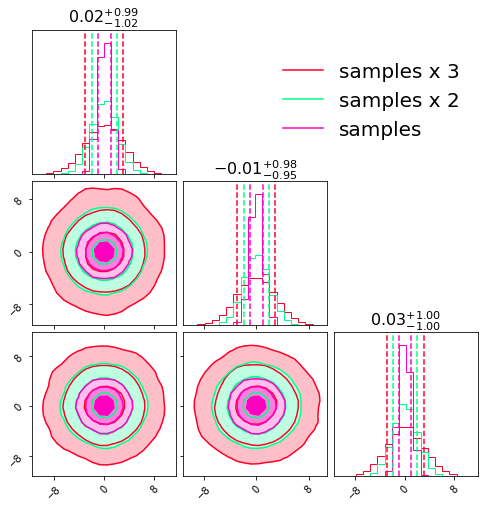

In [7]:
main()

In [131]:
import utils
p = utils.ArgumentParser()


#DDP Congigs
p.add_argument('--gpu', default=None, type=int)
p.add_argument('--device', default='cuda', help='device')

p.add_argument('--world-size', default=-1, type=int, 
                        help='number of nodes for distributed training')
p.add_argument('--rank', default=-1, type=int, 
                    help='node rank for distributed training')
p.add_argument('--dist-url', default='env://', type=str, 
                    help='url used to set up distributed training')
p.add_argument('--dist-backend', default='nccl', type=str, 
                    help='distributed backend')
p.add_argument('--local_rank', default=-1, type=int, 
                    help='local rank for distributed training')
p.add_argument('-j', '--workers', default=2, type=int, metavar='N',
                        help='number of data loading workers (default: 16)')

args = p.parse_args()

usage: ipykernel_launcher.py [-h] [-c CONFIG [CONFIG ...]] [--gpu GPU]
                             [--device DEVICE] [--world-size WORLD_SIZE]
                             [--rank RANK] [--dist-url DIST_URL]
                             [--dist-backend DIST_BACKEND]
                             [--local_rank LOCAL_RANK] [-j N]
ipykernel_launcher.py: error: unrecognized arguments: -f /n/home11/nswood/.local/share/jupyter/runtime/kernel-7b9bbc1a-443c-4393-865a-20579ade61a4.json


SystemExit: 2

In [121]:
p ='/n/home11/nswood/FlatSamples_Dev/transformer_large_trains_pretrained/transformer/Parameters'
a = torch.load(p)
vars(a)

{'config': [],
 'mname': None,
 'loss': 'categorical',
 'model': 'transformer',
 'nepochs': 150,
 'ipath': '/n/holyscratch01/iaifi_lab/jkrupa/19May23_physicalpt_v2_with2018_v2/train/raw/',
 'vpath': '/n/holyscratch01/iaifi_lab/jkrupa/19May23_physicalpt_v2_with2018_v2/val/raw/',
 'opath': 'transformer_large_trains',
 'mpath': 'transformer_large_trains_pretrained/transformer/epoch_67_transformer_loss_0.5034_0.5031_acc_0.8007_0.8007.pth',
 'prepath': None,
 'continue_training': True,
 'sv': False,
 'De': None,
 'Do': None,
 'hidden': None,
 'nparts': 100,
 'LAMBDA_ADV': None,
 'nclasses': 4,
 'plot_text': 'Transformer; dummy',
 'mini_dataset': True,
 'plot_features': False,
 'run_captum': False,
 'test_run': False,
 'make_PN': False,
 'make_N2': False,
 'is_binary': False,
 'is_peaky': False,
 'no_heavy_flavorQCD': False,
 'one_hot_encode_pdgId': False,
 'SV': False,
 'temperature': None,
 'n_out_nodes': 20,
 'qcd_only': False,
 'seed_only': False,
 'abseta': False,
 'kinematics_only': Fa

In [126]:
!pwd

/n/home11/nswood/FlatSamples_Dev


In [130]:
import json
with open("/n/home11/nswood/FlatSamples_Dev/Params_test", 'w') as file:
    # Write the dictionary to the file
    json.dump(args, file)

NameError: name 'args' is not defined

# SIMCLR Loss Testing

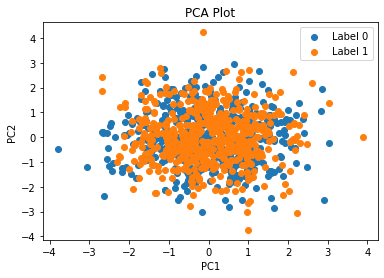

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate random N-dimensional binary-labeled data
N = 1000  # Number of instances
D = 10  # Number of dimensions
labels = np.random.randint(0, 2, N)  # Binary labels
data = np.random.randn(N, D)  # Random N-dimensional data

# Apply PCA to reduce dimensionality to 2 for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Separate data points based on labels
data_label0 = data_pca[labels == 0]
data_label1 = data_pca[labels == 1]

# Create the PCA plot
plt.scatter(data_label0[:, 0], data_label0[:, 1], label='Label 0')
plt.scatter(data_label1[:, 0], data_label1[:, 1], label='Label 1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.legend()
plt.show()


In [102]:
# Generate random embeddings and labels
embeddings = torch.randn(10, 64)  # 10 instances with 64-dimensional embeddings
labels = torch.randint(0, 2, (10,))  # Random binary labels

# Compute the Margin Triplet Loss
loss = margin_triplet_loss(embeddings, labels)

print("Margin Triplet Loss:", loss.item())


Margin Triplet Loss: 12.085868835449219


In [95]:
dl = gen_matched_simple_data(data_train,500,20,True)

In [2]:
ipath = '/n/holyscratch01/iaifi_lab/jkrupa/19May23_physicalpt_v2_with2018_v2/train/raw/'
vpath = '/n/holyscratch01/iaifi_lab/jkrupa/19May23_physicalpt_v2_with2018_v2/val/raw/'

In [3]:
sorted(glob.glob(ipath+'*h5'))[:10]

['/n/holyscratch01/iaifi_lab/jkrupa/19May23_physicalpt_v2_with2018_v2/train/raw/merged_0_train.h5',
 '/n/holyscratch01/iaifi_lab/jkrupa/19May23_physicalpt_v2_with2018_v2/train/raw/merged_100_train.h5',
 '/n/holyscratch01/iaifi_lab/jkrupa/19May23_physicalpt_v2_with2018_v2/train/raw/merged_101_train.h5',
 '/n/holyscratch01/iaifi_lab/jkrupa/19May23_physicalpt_v2_with2018_v2/train/raw/merged_102_train.h5',
 '/n/holyscratch01/iaifi_lab/jkrupa/19May23_physicalpt_v2_with2018_v2/train/raw/merged_103_train.h5',
 '/n/holyscratch01/iaifi_lab/jkrupa/19May23_physicalpt_v2_with2018_v2/train/raw/merged_104_train.h5',
 '/n/holyscratch01/iaifi_lab/jkrupa/19May23_physicalpt_v2_with2018_v2/train/raw/merged_105_train.h5',
 '/n/holyscratch01/iaifi_lab/jkrupa/19May23_physicalpt_v2_with2018_v2/train/raw/merged_106_train.h5',
 '/n/holyscratch01/iaifi_lab/jkrupa/19May23_physicalpt_v2_with2018_v2/train/raw/merged_107_train.h5',
 '/n/holyscratch01/iaifi_lab/jkrupa/19May23_physicalpt_v2_with2018_v2/train/raw/merg

In [3]:
import dataset_loader
import importlib
importlib.reload(dataset_loader)
data_train = dataset_loader.zpr_loader(ipath,maxfiles=5) 
# data_val = dataset_loader.zpr_loader(vpath,maxfiles=10)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:13<00:00,  2.65s/it]


self.data_features.shape (274190, 100, 13)


In [137]:
dt = data_train[0:100000]

In [142]:
x_pf = dt[0]
x_sv = dt[1]
jet_f = dt[2]
l = dt[3]

In [145]:
torch.save(jet_f,'100k_jet_f')
torch.save(l,'100k_l')
torch.save(x_sv,'100k_x_sv')
torch.save(x_pf,'100k_x_pf')

pt, pt/ptjet, eta, eta-etajet, phi, phi-phijet, d0 (impact parameter in xy direction), dz (impact parameter in z direction)
and then the last 5 are just one-hot-encoded labels

In [1]:
plt.hist(x_pf[:,:,0])
plt.title("total pt distribution")

NameError: name 'plt' is not defined

## Pretraining Jet Matching

In [75]:
loader = gen_matched_data(data_train, 2000)

In [38]:
loader = gen_matched_simple_data(data_train, 2000)

NameError: name 'DataLoader' is not defined

In [85]:
for istep, (matched_x_pf, matched_x_sv, matched_jet_features, matching_label) in enumerate(tqdm(loader)):
    print(matched_x_pf.size(), matched_x_sv.size(), matched_jet_features.size(), matching_label.size())
    break


  0%|                                                                                                                                               | 0/667 [00:00<?, ?it/s]

torch.Size([3, 2, 100, 13]) torch.Size([3, 2, 5, 16]) torch.Size([3, 2, 9]) torch.Size([3])


In [90]:
matching_label.float().type()

'torch.FloatTensor'

In [81]:
arr[0].size()

torch.Size([3, 2, 100, 13])

In [80]:
arr[1].size()

torch.Size([3, 2, 5, 16])

In [79]:
arr[2].size()

torch.Size([3, 2, 9])

In [82]:
arr[3].size()

torch.Size([3])

In [77]:
for istep, (arr) in enumerate(tqdm(loader)):
    break
    
    


  0%|                                                                                                                                               | 0/667 [00:00<?, ?it/s]


In [74]:
#specify n the number of jet matchings to prepare, must be <= size of dataset
#
# It will make 1/2 correct matchings and 1/2 incorrect (equal probability to be any incorrect combination
#
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
import torch


def gen_matched_data(data, n,*args):
    indices = torch.randperm(len(data))[:n]
    dt = data[indices]
    x_pf, x_sv, jet_features, jet_truthlabel = dt
    
    mask1 = torch.squeeze(torch.nonzero(torch.all(jet_truthlabel == torch.tensor([1., 0., 0., 0.]), dim=1)))
    mask2 = torch.squeeze(torch.nonzero(torch.all(jet_truthlabel == torch.tensor([0., 1., 0., 0.]), dim=1)))
    mask3 = torch.squeeze(torch.nonzero(torch.all(jet_truthlabel == torch.tensor([0., 0., 1., 0.]), dim=1)))
    mask4 = torch.squeeze(torch.nonzero(torch.all(jet_truthlabel == torch.tensor([0., 0., 0., 1.]), dim=1)))
    masks = [mask1,mask2,mask3,mask4]


    pre_train_jets = []
    truth = []
    pre_train_sv = []
    pre_train_jet_features = []
    for v in range(n):
        index = torch.randint(0, n, (1,)).item()
        cur_label = jet_truthlabel[index]
        cur_jet = x_pf[index]
        cur_sv = x_sv[index]
        if v < n/2:
            #Get the same class of jets
            cur_mask = masks[torch.squeeze(torch.nonzero(cur_label)).item()]
            exclude_index = index
            num_elements = cur_mask.numel() - 1
            random_index = torch.randint(0, num_elements, (1,)).item()
            if random_index >= exclude_index:
                random_index += 1
            random_element = cur_mask[random_index]
            truth.append(1)
        else:
            #Get different classes of jets
            exclude_index = torch.squeeze(torch.nonzero(cur_label)).item()
            num_elements = 3
            random_index = torch.randint(0, num_elements, (1,)).item()
            if random_index >= exclude_index:
                random_index += 1
            cur_mask = masks[random_index]
            rand_mask_index= torch.randint(0, cur_mask.numel(), (1,)).item()
            random_element = cur_mask[rand_mask_index]
            truth.append(0)
        matched_jets = [x_pf[index], x_pf[random_element]]
        matched_sv = [x_sv[index], x_sv[random_element]]
        matched_jet_features = [jet_features[index], jet_features[random_element]]
        pre_train_jets.append(matched_jets)
        pre_train_sv.append(matched_sv)
        pre_train_jet_features.append(matched_jet_features)
    # Assuming you have a list of 5000 pairs of tensors
    pairs = pre_train_jets
    # Combine the tensors into a single tensor
    combined_matched_jets = torch.stack([torch.stack(pair, dim=0) for pair in pairs], dim=0)
    
    
    pairs = pre_train_sv
    # Combine the tensors into a single tensor
    combined_matched_sv = torch.stack([torch.stack(pair, dim=0) for pair in pairs], dim=0)
    
    pairs = pre_train_jet_features
    # Combine the tensors into a single tensor
    combined_matched_jet_features = torch.stack([torch.stack(pair, dim=0) for pair in pairs], dim=0)
    
    truth = torch.tensor(truth)
    permutation = torch.randperm(n)

    combined_matched_jets = combined_matched_jets[permutation]
    truth = truth[permutation]
    combined_matched_sv = combined_matched_sv[permutation]
    
    loader = DataLoader(TensorDataset(combined_matched_jets,combined_matched_sv,combined_matched_jet_features,truth),batch_size=3, *args)#,shuffle=(train_sampler is None),)
    return loader


In [37]:
def gen_matched_simple_data(data, n,*args):
    indices = torch.randperm(len(data))[:n]
    dt = data[indices]
    x_pf, x_sv, jet_features, jet_truthlabel = dt
    jet_truthlabel = torch.hstack((torch.unsqueeze(jet_truthlabel[:,0:3].sum(dim = 1),dim=1), torch.unsqueeze(jet_truthlabel[:,3],dim=1)))
    mask1 = torch.squeeze(torch.nonzero(torch.all(jet_truthlabel == torch.tensor([1., 0.]), dim=1)))
    mask2 = torch.squeeze(torch.nonzero(torch.all(jet_truthlabel == torch.tensor([0., 1.]), dim=1)))
    masks = [mask1,mask2]

    pre_train_jets = []
    truth = []
    pre_train_sv = []
    pre_train_jet_features = []
    for v in range(n):
        index = torch.randint(0, n, (1,)).item()
        cur_label = jet_truthlabel[index]
        cur_jet = x_pf[index]
        cur_sv = x_sv[index]
        if v < n/2:
            #Get the same class of jets
            cur_mask = masks[torch.squeeze(torch.nonzero(cur_label)).item()]
            exclude_index = index
            num_elements = cur_mask.numel() - 1
            random_index = torch.randint(0, num_elements, (1,)).item()
            if random_index >= exclude_index:
                random_index += 1
            random_element = cur_mask[random_index]
            truth.append(1)
        else:
            #Get different classes of jets
            exclude_index = torch.squeeze(torch.nonzero(cur_label)).item()
            cur_mask = masks[(1+exclude_index)%2]
            rand_mask_index= torch.randint(0, cur_mask.numel(), (1,)).item()
            random_element = cur_mask[rand_mask_index]
            truth.append(0)
        matched_jets = [x_pf[index], x_pf[random_element]]
        matched_sv = [x_sv[index], x_sv[random_element]]
        matched_jet_features = [jet_features[index], jet_features[random_element]]
        pre_train_jets.append(matched_jets)
        pre_train_sv.append(matched_sv)
        pre_train_jet_features.append(matched_jet_features)
    # Assuming you have a list of 5000 pairs of tensors
    pairs = pre_train_jets
    # Combine the tensors into a single tensor
    combined_matched_jets = torch.stack([torch.stack(pair, dim=0) for pair in pairs], dim=0)


    pairs = pre_train_sv
    # Combine the tensors into a single tensor
    combined_matched_sv = torch.stack([torch.stack(pair, dim=0) for pair in pairs], dim=0)

    pairs = pre_train_jet_features
    # Combine the tensors into a single tensor
    combined_matched_jet_features = torch.stack([torch.stack(pair, dim=0) for pair in pairs], dim=0)

    truth = torch.tensor(truth)
    permutation = torch.randperm(n)

    combined_matched_jets = combined_matched_jets[permutation]
    truth = truth[permutation]
    combined_matched_sv = combined_matched_sv[permutation]

    loader = DataLoader(TensorDataset(combined_matched_jets,combined_matched_sv,combined_matched_jet_features,truth),batch_size=3, *args)#,shuffle=(train_sampler is None),)
    return loader

In [41]:
torch.load('transformer_large_trains/transformer2023_06_16_23_12_02/epoch_49_transformer_loss_0.5535_0.5586_acc_0.7818_0.7794.pth',map_location=torch.device('cpu'))

OrderedDict([('module.input_bn.weight',
              tensor([0.8485, 0.7967, 0.3308, 0.8797, 0.0162, 0.8782, 2.8908, 2.4246, 0.5521,
                      0.1109, 0.1003, 0.7172, 0.7897])),
             ('module.input_bn.bias',
              tensor([ 0.0317,  0.0375,  0.0148, -0.0328,  0.0085,  0.0027, -0.0155, -0.0096,
                       0.0520,  0.0080,  0.0057, -0.1431,  0.1832])),
             ('module.input_bn.running_mean',
              tensor([ 5.4060e+00,  9.1910e-03, -8.7081e-04,  2.8633e-04, -1.0638e-02,
                      -3.0267e-05, -2.1257e-02, -2.2075e-02,  1.5829e-01,  1.6763e-03,
                       1.5585e-03,  3.1770e-01,  4.7120e-01])),
             ('module.input_bn.running_var',
              tensor([3.8622e+02, 9.5613e-04, 5.4868e-01, 3.4284e-02, 1.7126e+00, 3.6071e-02,
                      1.5594e+00, 9.2676e+00, 1.3323e-01, 1.6735e-03, 1.5561e-03, 2.1676e-01,
                      2.4915e-01])),
             ('module.input_bn.num_batches_tracked', 

In [22]:
import models
import transformers
model_t = models.Transformer(args,"transformer",_softmax,_sigmoid, args.sv)

ModuleNotFoundError: No module named 'transformers'

## Pretraining KNN Masking

In [6]:
from torch.utils.data import DataLoader
train_loader = DataLoader(data_train, batch_size=20,shuffle=True,multiprocessing_context='spawn',num_workers=16)#,pin_memory=True)
val_loader = DataLoader(data_val, batch_size=20,shuffle=True,multiprocessing_context='spawn',num_workers=16)#,pin_memory=True)

In [7]:
ex = data_train[0]

In [8]:
batched_dt = next(iter(train_loader))

In [13]:
ex_jet =batched_dt[0][0]


In [24]:
ex_jet[0]

tensor([ 1.4550e+02,  2.5244e-01, -2.2676e+00, -2.0020e-01,  1.5107e+00,
        -4.0283e-02,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00])

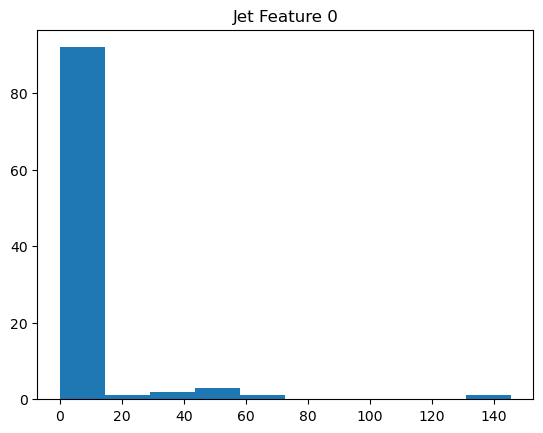

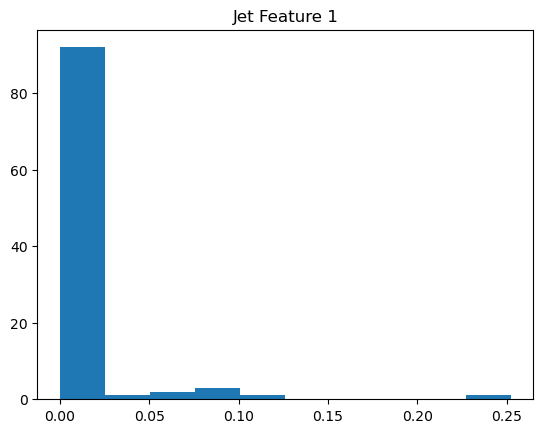

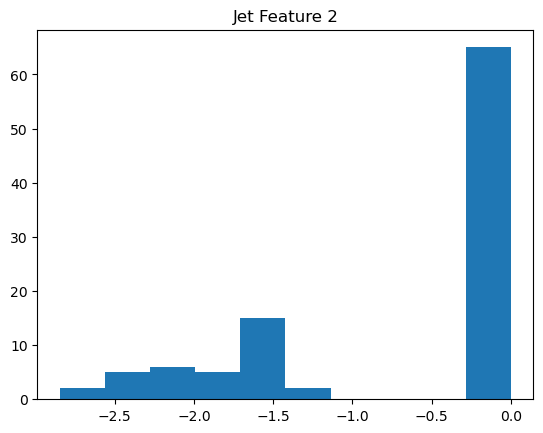

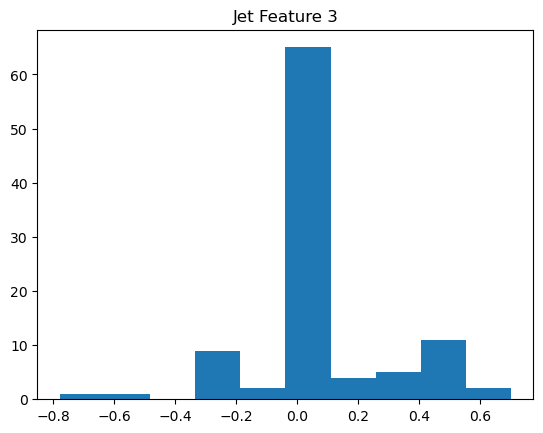

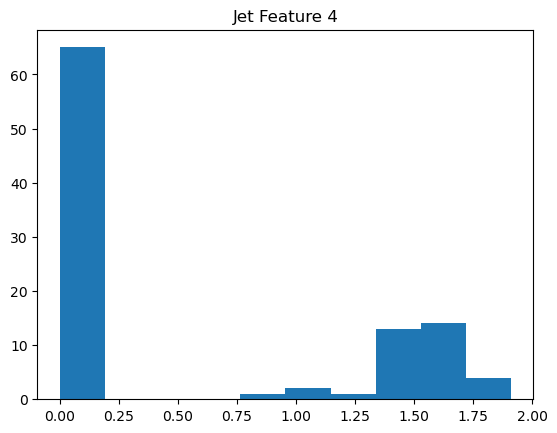

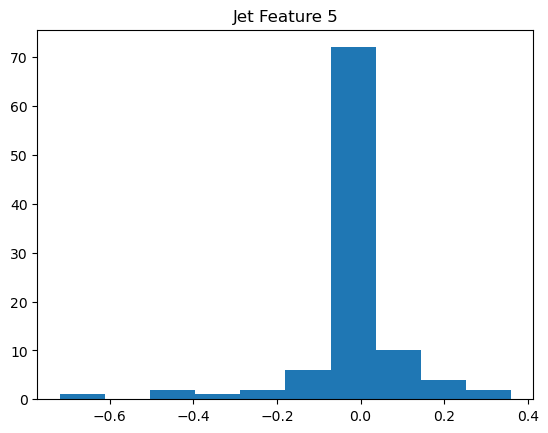

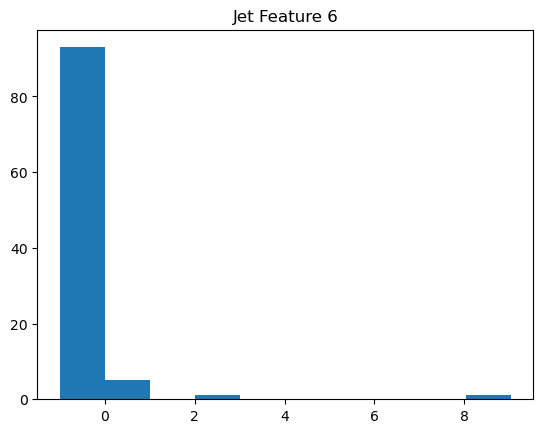

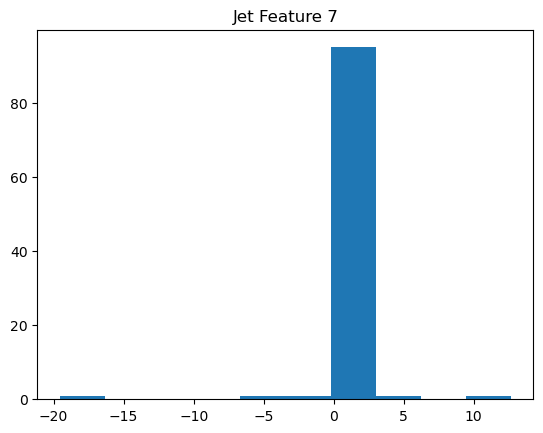

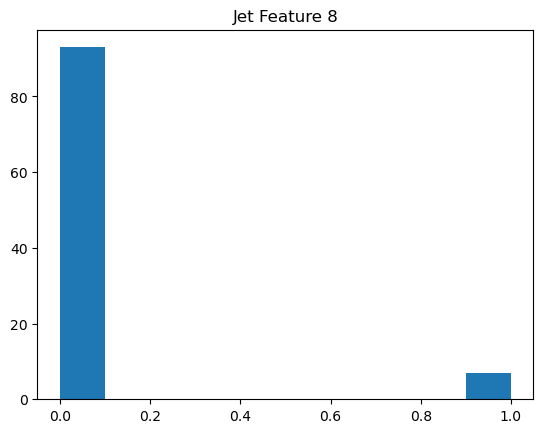

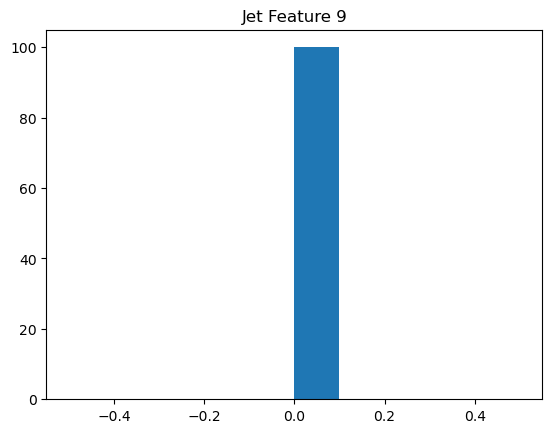

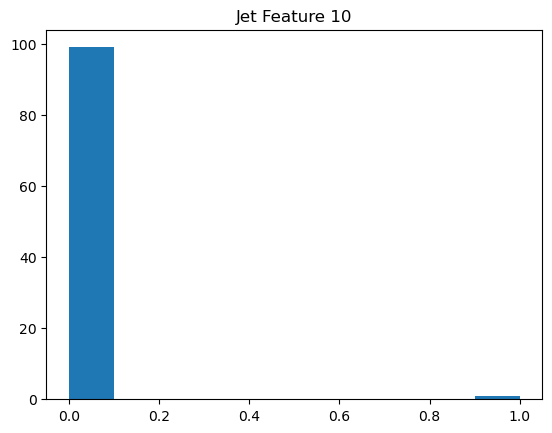

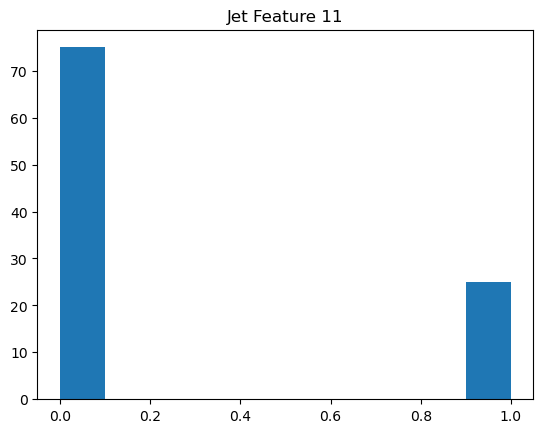

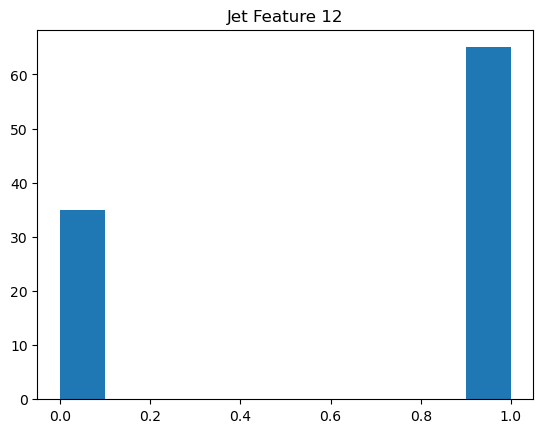

In [39]:
for i in range(ex_jet.shape[1]):
    plt.figure()
    plt.title(f'Jet Feature {i}')
    plt.hist(ex_jet[:,i])
    plt.show()

In [52]:
index = np.random.randint(100)
k = 9
from sklearn.neighbors import NearestNeighbors

  # Number of neighbors to consider
knn = NearestNeighbors(n_neighbors=k)

knn.fit(np.array(ex_jet[:,0:3]))
distances, indices = knn.kneighbors(np.array(torch.unsqueeze(ex_jet[index,0:3],dim=0)))

In [53]:
distances, indices

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[64, 57, 61, 58, 63, 62, 59, 67, 60]]))

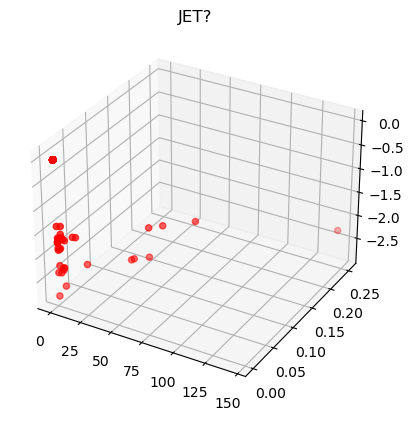

In [58]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ex_jet[:,0], ex_jet[:,1], ex_jet[:,2], c='r', marker='o')
plt.title('JET?')
plt.show()